## Visão geral dos dados

---



Tipos de variáveis

Missing values

Duplicatas

Valores inconsistentes

Outliers extremos

Análise de desbalanceamento da variável alvo



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

### BANCO DE DADOS

---
Os dados originais contem informações sensíveis dos clientes, como:

*  Localização da transação
*  Tipo de estabelecimento
*  Perfil comportamental
*  Horário detalhado da compra

 Por questões legais (LGPD/GDPRP) para garantir anonimização e proteção da privacidade, o  PCA (Principal Component Analysis) foi utilizado antes da disponibilização pública dos dados.

Como resultado da apicação do PCA as variáveis originais foram transformadas em componentes principais (V1, V2, ..., V28)
Cada componente é uma combinação linear das variáveis originais
As componentes preservam a maior parte da variância e dos padrões relevantes



In [2]:
df = pd.read_csv('creditcard.csv')

print(df.shape)
df.head(5)

(130802, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130802 entries, 0 to 130801
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    130802 non-null  int64  
 1   V1      130802 non-null  float64
 2   V2      130802 non-null  float64
 3   V3      130802 non-null  float64
 4   V4      130802 non-null  float64
 5   V5      130802 non-null  float64
 6   V6      130802 non-null  float64
 7   V7      130802 non-null  float64
 8   V8      130802 non-null  float64
 9   V9      130802 non-null  float64
 10  V10     130802 non-null  float64
 11  V11     130802 non-null  float64
 12  V12     130802 non-null  float64
 13  V13     130802 non-null  float64
 14  V14     130802 non-null  float64
 15  V15     130802 non-null  float64
 16  V16     130802 non-null  float64
 17  V17     130802 non-null  float64
 18  V18     130802 non-null  float64
 19  V19     130802 non-null  float64
 20  V20     130802 non-null  float64
 21  V21     13

### VALORES NULOS

---
* Variáveis com **>40% de missing** serão avaliadas para remoção
* Variáveis com missing moderado serão tratadas posteriormente (mediana/moda/modelo)


In [4]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame('percentual_missing')
)

missing[missing['percentual_missing'] > 0]

,percentual_missing
Class,0.000008
V26,0.000008
V25,0.000008
Amount,0.000008
V27,0.000008
V28,0.000008


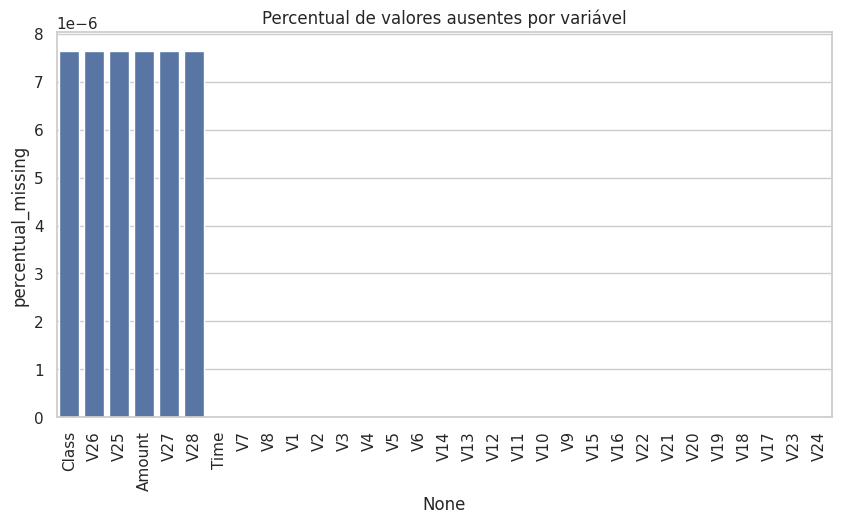

In [5]:
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing['percentual_missing'])
plt.xticks(rotation=90)
plt.title('Percentual de valores ausentes por variável')
plt.show()

### VALORES DUPLICADOS

---
Duplicatas podem inflar métricas e causar overfitting por isso iremos tratar nas proximas etapas.


In [6]:
duplicados = df.duplicated().sum()
duplicados

print(f"Percentual de linhas duplicadas: {duplicados / len(df):.2%}")

Percentual de linhas duplicadas: 0.38%


### VARIÁVEL ALVO

---
Desbalanceamento da classe é comum em se tratando de anomalias nesse caso  é um problema fortemente desbalanceado, o que inviabiliza o uso de accuracy como métrica principal. Trataremos na etapa de pré modelagem.


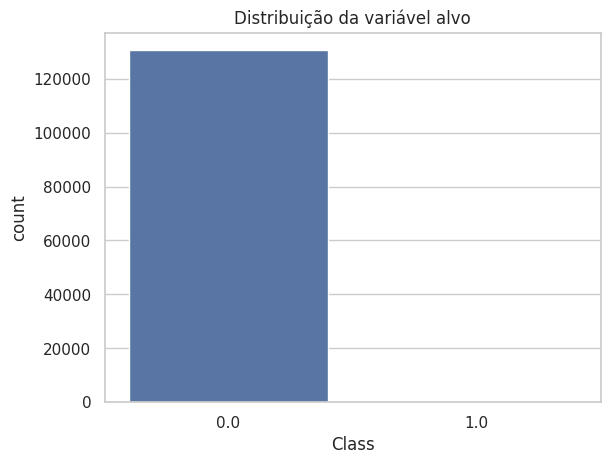

In [8]:
df['Class'].value_counts(normalize=True)

sns.countplot(x='Class', data=df)
plt.title('Distribuição da variável alvo')
plt.show()

### VALORES DISCREPANTES

---
 Outliers não serão removidos nessa etapa, apenas identificados.


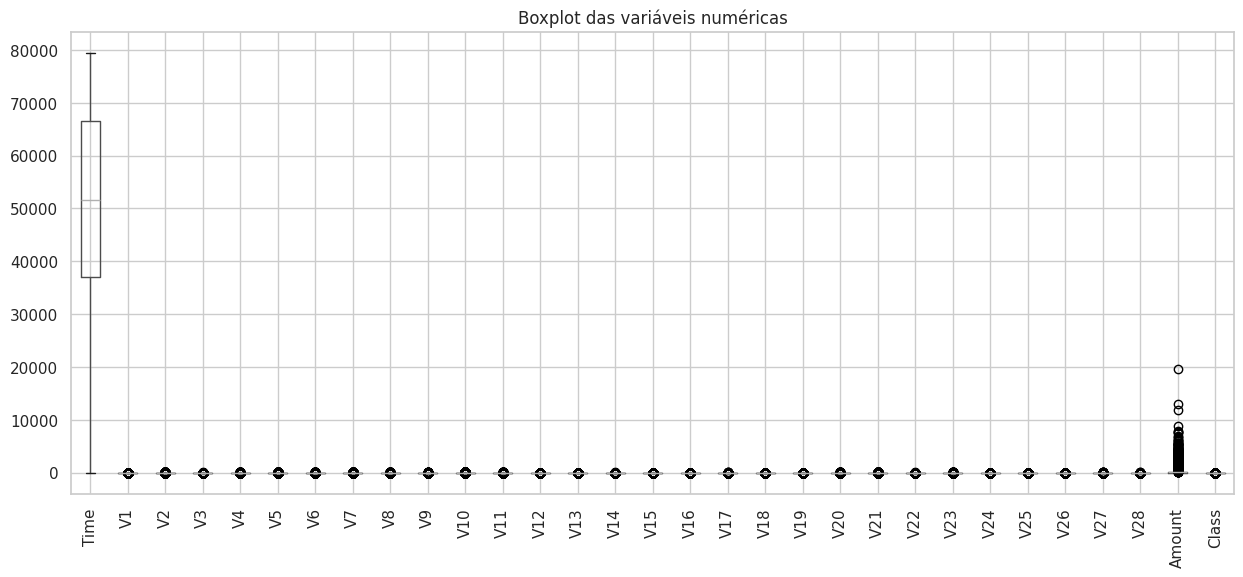

In [9]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,6))
df[num_cols].boxplot(rot=90)
plt.title('Boxplot das variáveis numéricas')
plt.show()

### CONCLUSÕES INICIAIS

---
* Presença de valores ausentes relevantes
* Base altamente desbalanceada
* Possíveis riscos de leakage
* Necessidade clara de tratamento de dados


